Name: Laiba Umer
Oasis InfoByte Task 2
Unemployment Analysis with Python


In [1]:
#This dataset contains the unemployment rate of all the states in India 
#Explanation of Columns:
Region = "States in India"
Date="date when unemployment rate is observed"
Frequency="monthly"
Estimated_Unemployemnt_Rate ="percentage of people unemployed in each state of India"
Estimated_Employed="percentage of people employed"
Estimated_Labour_Participation_Rate="labor force participation rate by dividing the number of people actively participating in the labor force by total number of people eligible to participate in the labor force"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [10]:
data=pd.read_csv("Unemployment in India.csv")

In [14]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [15]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [17]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [20]:
data[' Date']=pd.to_datetime(data[' Date'])
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [21]:
data.columns=data.columns.str.strip()

In [23]:
data['Frequency']=data['Frequency'].astype('category')

In [24]:
data.dropna(inplace=True)
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [25]:
data.shape

(740, 7)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    category      
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), object(2)
memory usage: 41.3+ KB


In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [28]:
numerical_cols=['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
scaler= StandardScaler()
data[numerical_cols]=scaler.fit_transform(data[numerical_cols])

In [29]:
print(data[numerical_cols])

     Estimated Unemployment Rate (%)  Estimated Employed  \
0                          -0.759558            0.593216   
1                          -0.815559            0.563119   
2                          -0.750225            0.604050   
3                          -0.790359            0.628669   
4                          -0.617688            0.625090   
..                               ...                 ...   
749                        -0.395550            0.453659   
750                        -0.477685            0.445609   
751                         0.358600            0.259202   
752                         0.320332            0.251956   
753                        -0.179946            0.233154   

     Estimated Labour Participation Rate (%)  
0                                   0.075241  
1                                  -0.071570  
2                                   0.107318  
3                                   0.165303  
4                                   0.252896

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scalerminmax = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
scaler = MinMaxScaler()
data[scalerminmax] = scaler.fit_transform(data[scalerminmax])
print(data[scalerminmax])

     Estimated Unemployment Rate (%)  Estimated Employed  \
0                           0.047563            0.261321   
1                           0.039745            0.256002   
2                           0.048866            0.263236   
3                           0.043263            0.267588   
4                           0.067370            0.266955   
..                               ...                 ...   
749                         0.098384            0.236654   
750                         0.086917            0.235231   
751                         0.203675            0.202284   
752                         0.198332            0.201003   
753                         0.128486            0.197680   

     Estimated Labour Participation Rate (%)  
0                                   0.504895  
1                                   0.484808  
2                                   0.509284  
3                                   0.517218  
4                                   0.529203

In [39]:
summary_=data.describe()
print(summary_)

                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                         0.153609   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         0.060692   
50%              2019-11-30 00:00:00                         0.108809   
75%              2020-03-31 00:00:00                         0.207030   
max              2020-06-30 00:00:00                         1.000000   
std                              NaN                         0.139709   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count          740.000000                               740.000000  
mean             0.156469                                 0.494600  
min              0.000000                                 0.000000  
25%              0.024952                                 0.417497

In [41]:
region = data[data['Region'] == 'Bihar']
region
region.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,28,28.000000,28.000000,28.000000
mean,2019-12-15 06:51:25.714285824,0.246524,0.269348,0.419040
min,2019-05-31 00:00:00,0.115585,0.029556,0.364787
25%,2019-08-31 00:00:00,0.157024,0.065499,0.404414
50%,2019-12-15 12:00:00,0.195596,0.188072,0.423278
75%,2020-03-31 00:00:00,0.261142,0.501410,0.434251
max,2020-06-30 00:00:00,0.765833,0.530810,0.455436
std,NaN,0.164647,0.217104,0.021646


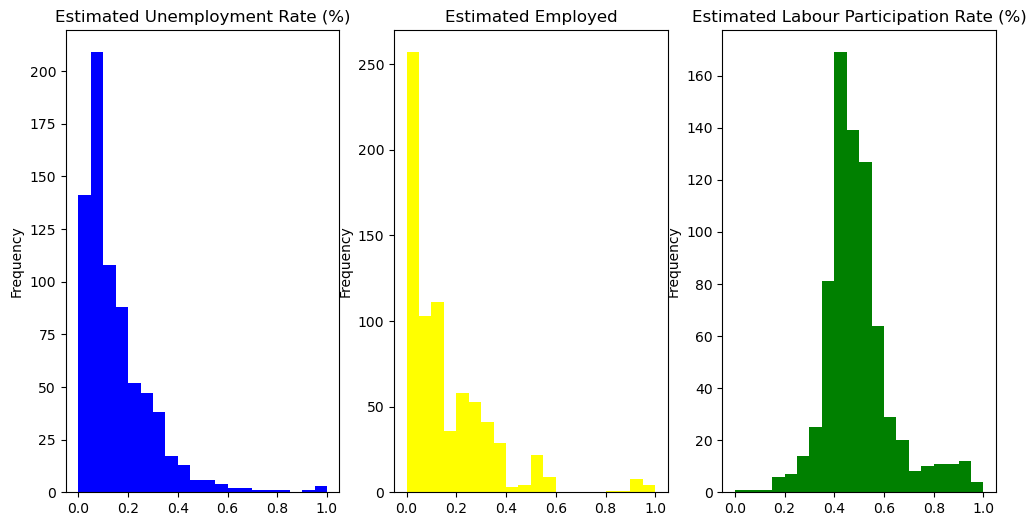

In [42]:
columns_ = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
hist_colors = ['blue', 'yellow', 'green']
fig, axes = plt.subplots(1, len(columns_), figsize=(12, 6))
for i, column in enumerate(columns_):
    data[column].plot.hist(bins=20, color=hist_colors[i], ax=axes[i])
    axes[i].set_title(column)
    
plt.show()

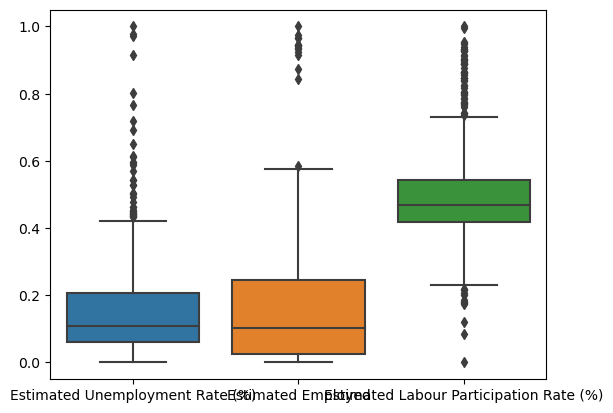

In [48]:
import seaborn as sns

sns.boxplot(data=data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])
plt.show()

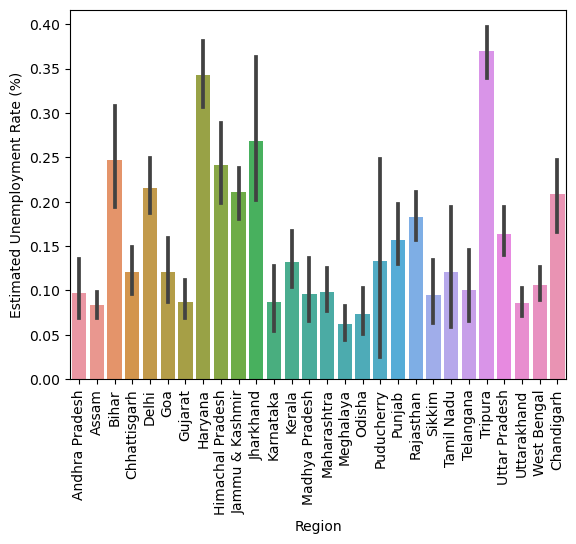

In [49]:
sns.barplot(data=data, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()



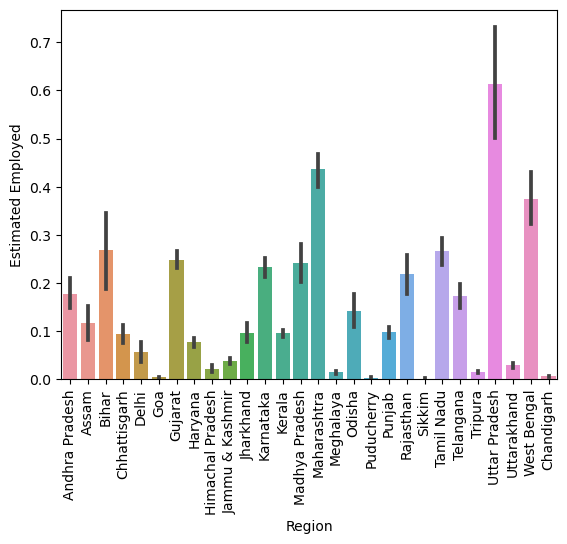

In [51]:
sns.barplot(data=data, x='Region', y='Estimated Employed')
plt.xticks(rotation=90)
plt.show()

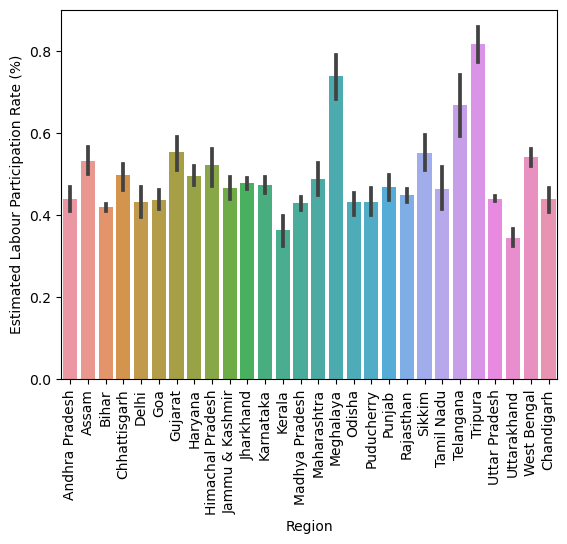

In [58]:
sns.barplot(data=data, x='Region', y='Estimated Labour Participation Rate (%)')
plt.xticks(rotation=90)
plt.show()

In [59]:
category_mapping = {'rural': 0, 'urban': 1}

data['Area'] = data['Area'].replace(category_mapping)

In [60]:
grouped_data = data.groupby('Region')
summary_stats_by_region = grouped_data.describe()
print(summary_stats_by_region)

                  Date                                                      \
                 count                           mean                  min   
Region                                                                       
Andhra Pradesh      28  2019-12-15 06:51:25.714285824  2019-05-31 00:00:00   
Assam               26  2019-12-09 10:09:13.846153728  2019-05-31 00:00:00   
Bihar               28  2019-12-15 06:51:25.714285824  2019-05-31 00:00:00   
Chandigarh          12            2019-11-19 22:00:00  2019-05-31 00:00:00   
Chhattisgarh        28  2019-12-15 06:51:25.714285824  2019-05-31 00:00:00   
Delhi               28  2019-12-15 06:51:25.714285824  2019-05-31 00:00:00   
Goa                 24            2019-11-17 09:00:00  2019-05-31 00:00:00   
Gujarat             28  2019-12-15 06:51:25.714285824  2019-05-31 00:00:00   
Haryana             28  2019-12-15 06:51:25.714285824  2019-05-31 00:00:00   
Himachal Pradesh    28  2019-12-15 06:51:25.714285824  2019-05-3

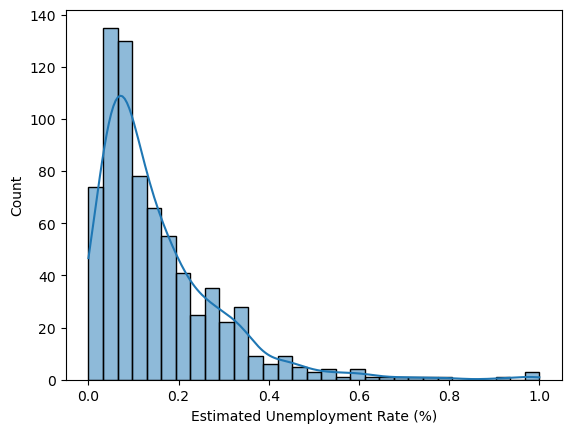

In [62]:
sns.histplot(data['Estimated Unemployment Rate (%)'], kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.show()


In [63]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    category      
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), object(2)
memory usage: 41.3+ KB


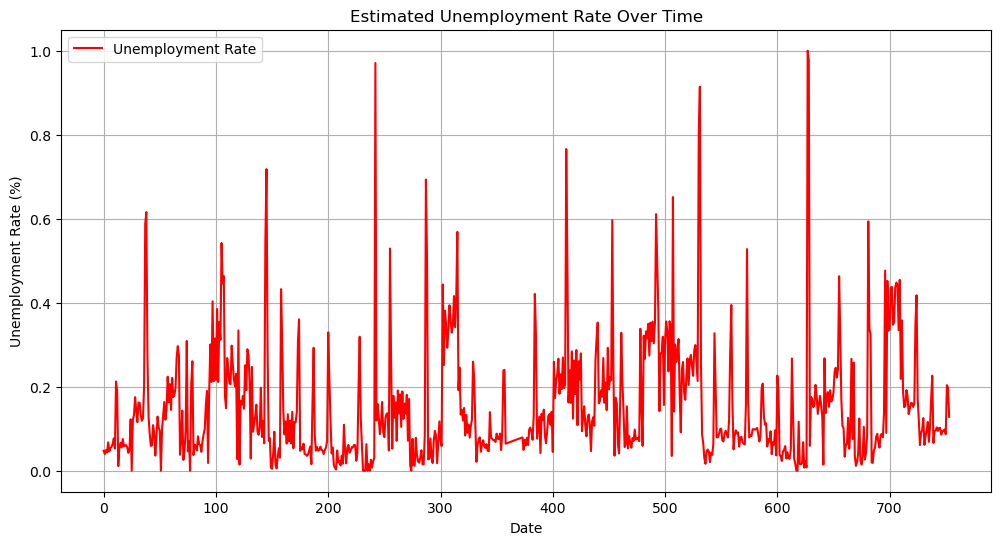

In [75]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Estimated Unemployment Rate (%)'], label= 'Unemployment Rate', color='Red')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

In [77]:
X = data.drop(columns=['Estimated Unemployment Rate (%)'])
y = data['Estimated Unemployment Rate (%)']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [78]:
print(X)

             Region  Estimated Employed  \
0    Andhra Pradesh            0.261321   
1    Andhra Pradesh            0.256002   
2    Andhra Pradesh            0.263236   
3    Andhra Pradesh            0.267588   
4    Andhra Pradesh            0.266955   
..              ...                 ...   
749     West Bengal            0.236654   
750     West Bengal            0.235231   
751     West Bengal            0.202284   
752     West Bengal            0.201003   
753     West Bengal            0.197680   

     Estimated Labour Participation Rate (%)   Area  
0                                   0.504895  Rural  
1                                   0.484808  Rural  
2                                   0.509284  Rural  
3                                   0.517218  Rural  
4                                   0.529203  Rural  
..                                       ...    ...  
749                                 0.519244  Urban  
750                                 0.506583  Urban

In [80]:
print(y)

0      0.047563
1      0.039745
2      0.048866
3      0.043263
4      0.067370
         ...   
749    0.098384
750    0.086917
751    0.203675
752    0.198332
753    0.128486
Name: Estimated Unemployment Rate (%), Length: 740, dtype: float64


In [100]:
print("Training set shape:",X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (518, 4) (518,)
Validation set shape: (111, 4) (111,)
Testing set shape: (111, 4) (111,)


In [108]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [112]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming data is your DataFrame
# Modify the following code according to your actual column names

# Features (X) and Target variable (y)
X = data.drop(['Estimated Unemployment Rate (%)'], axis=1)  # Drop target variable
y = data['Estimated Unemployment Rate (%)']  # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Region', 'Area'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor (or any other regression model of your choice)
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE) on Test Data:", mae)
print("R-squared (R²) on Test Data:", r2)

Mean Absolute Error (MAE) on Test Data: 0.05225092273665378
R-squared (R²) on Test Data: 0.6369211213260196


In [114]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [117]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Assuming data is your DataFrame
# Modify the following code according to your actual column names

# Features (X) and Target variable (y)
X = data.drop(['Estimated Unemployment Rate (%)'], axis=1)  # Drop target variable
y = data['Estimated Unemployment Rate (%)']  # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Region', 'Area'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a GradientBoostingRegressor (or any other regression model of your choice)
model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Assuming X_valid is your validation set

# Preprocess the validation set to match the training set
X_valid_processed = pd.get_dummies(X_valid, columns=['Region', 'Area'])
missing_cols = set(X.columns) - set(X_valid_processed.columns)
for col in missing_cols:
    X_valid_processed[col] = 0
X_valid_processed = X_valid_processed[X.columns]

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid_processed)

# Continue with your evaluation code
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)

Mean Absolute Error (MAE) on Validation Data: 0.05057442181167024
R-squared (R²) on Validation Data: 0.6669961687299057


In [120]:
model=SVR(kernel='linear')
#train the model
model.fit(X_train, y_train)

SVR(kernel='linear')

In [122]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming data is your DataFrame
# Modify the following code according to your actual column names

# Features (X) and Target variable (y)
X = data.drop(['Estimated Unemployment Rate (%)'], axis=1)  # Drop target variable
y = data['Estimated Unemployment Rate (%)']  # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Region', 'Area'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Assuming X_valid is your validation set

# Preprocess the validation set to match the training set
X_valid_processed = pd.get_dummies(X_valid, columns=['Region', 'Area'])
missing_cols = set(X.columns) - set(X_valid_processed.columns)
for col in missing_cols:
    X_valid_processed[col] = 0
X_valid_processed = X_valid_processed[X.columns]

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid_processed)

# Continue with your evaluation code
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)

Mean Absolute Error (MAE) on Validation Data: 0.032402613716139915
R-squared (R²) on Validation Data: 0.6823832678694802


In [124]:
# Assuming X_valid is your validation set

# Preprocess the validation set to match the training set
X_valid_processed = pd.get_dummies(X_valid, columns=['Region', 'Area'])

# Get missing columns in the validation set that are present in the training set
missing_cols = set(X.columns) - set(X_valid_processed.columns)

# Add the missing columns to the validation set with default values (0 in this case)
for col in missing_cols:
    X_valid_processed[col] = 0

# Ensure the order of columns in the validation set matches the order in the training set
X_valid_processed = X_valid_processed[X.columns]

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid_processed)

# Continue with your evaluation code
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)


Mean Absolute Error (MAE) on Validation Data: 0.032402613716139915
R-squared (R²) on Validation Data: 0.6823832678694802
